In [111]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abdelrehman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/abdelrehman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/abdelrehman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [112]:
df = pd.read_csv('train.csv')
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [113]:
df.columns

Index(['textID', 'text', 'sentiment'], dtype='object')

In [114]:
df = df.dropna(subset=['text'])
df.describe()

,textID,text,sentiment
count,27480,27480,27480
unique,27480,27480,3
top,cb774db0d1,"I`d have responded, if I were going",neutral
freq,1,1,11117


positive


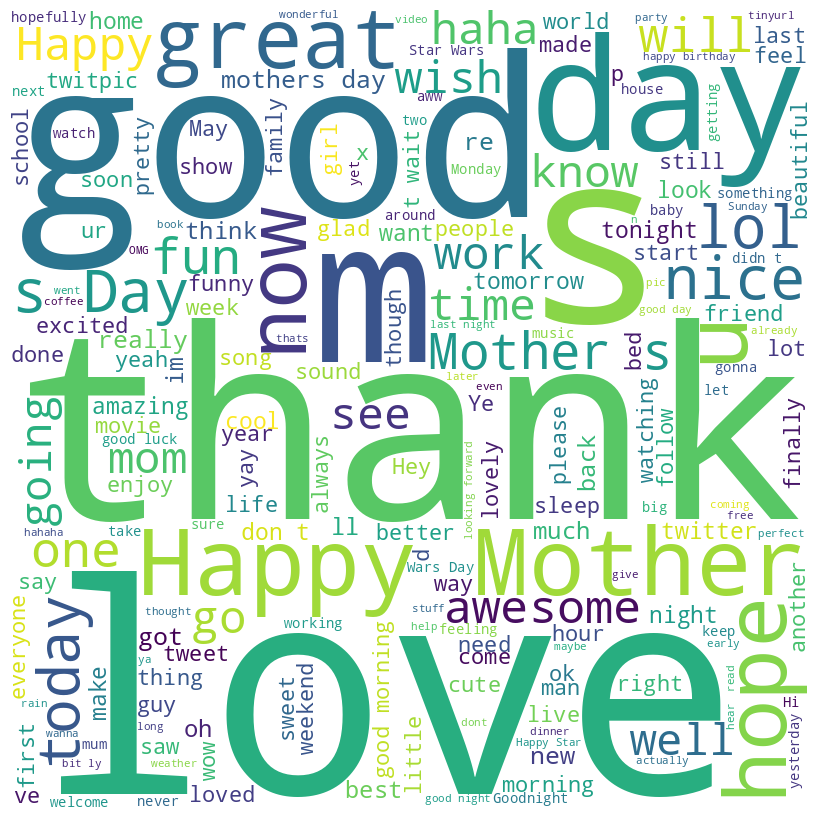

neutral


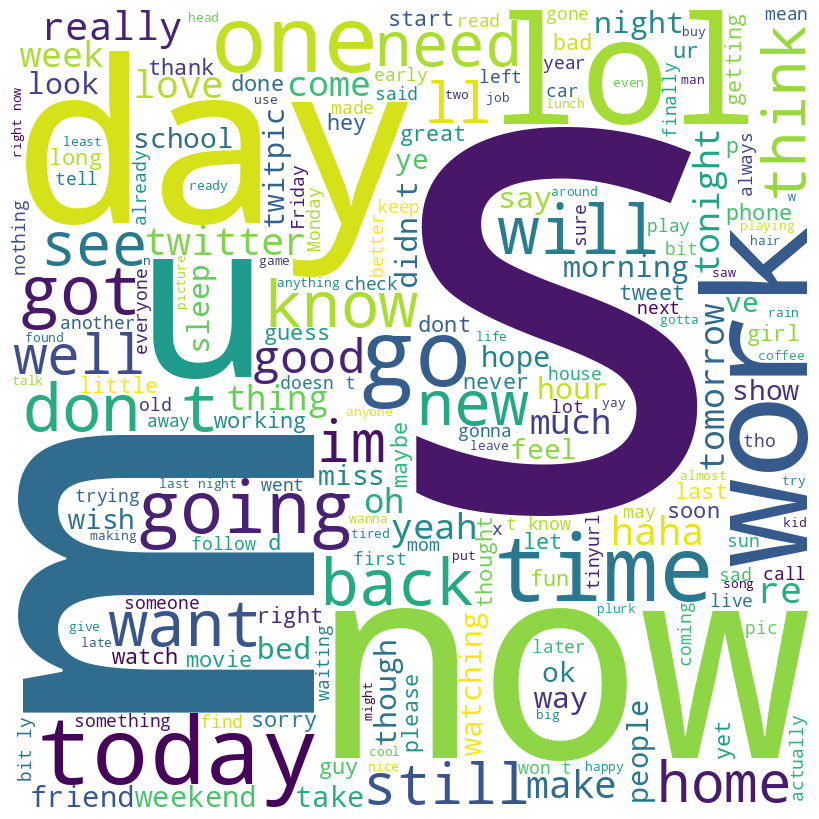

negative


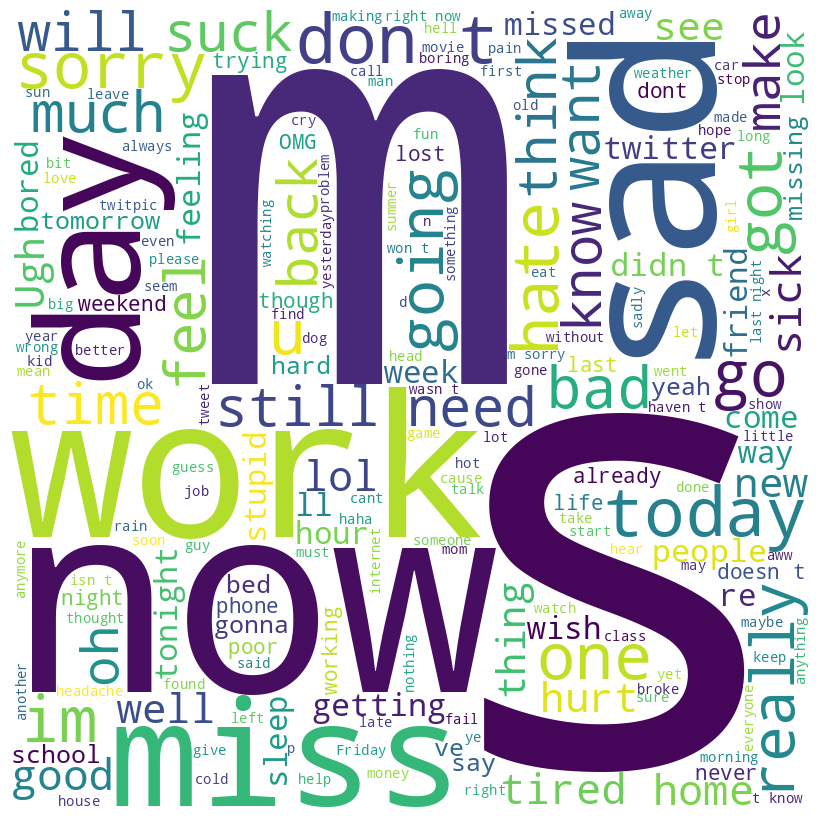

In [115]:
targets = ['positive', 'neutral', 'negative']
for target in targets:
    text = ' '.join(df[df['sentiment'] == target]['text'])

    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

    print(target)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


In [116]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    filtered_tokens_no_punct = [word for word in filtered_tokens if word.isalnum()]
    
    # Perform additional preprocessing steps if needed (e.g., stemming, lemmatization, etc.)
    # Example: Lemmatization using WordNetLemmatizer
    lemmatizer = nltk.WordNetLemmatizer()
    preprocessed_text = ' '.join([lemmatizer.lemmatize(word) for word in filtered_tokens_no_punct])
    
    return preprocessed_text


In [117]:
df['text'].apply(preprocess_text)

0                                          responded going
1                                  Sooo SAD miss San Diego
2                                             bos bullying
3                                    interview leave alone
4                          Sons put release already bought
                               ...                        
27476    wish could come see u Denver husband lost job ...
27477    wondered rake client made clear force devs lea...
27478    Yay good Enjoy break probably need hectic week...
27479                                                worth
27480                     flirting going ATG smile Yay hug
Name: text, Length: 27480, dtype: object

In [118]:
text_data = df['text']
labels = df['sentiment']

# Create TF-IDF features from the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(text_data)
y = labels

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
X_train, y_train

(<21984x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 195598 stored elements in Compressed Sparse Row format>,
 21209    positive
 18265    positive
 9684      neutral
 9689     positive
 22728     neutral
            ...   
 21576     neutral
 5391      neutral
 861       neutral
 15796    positive
 23655    positive
 Name: sentiment, Length: 21984, dtype: object)

In [121]:
clf.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [122]:
y_pred = clf.predict(X_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6359170305676856


In [124]:
df = pd.read_csv('test.csv')

In [125]:
X = tfidf_vectorizer.transform(df['text'])

In [126]:
prediction = clf.predict(X)
print(len(df['textID']), len(prediction))

3534 3534


In [127]:
results_df = pd.DataFrame({'textID': df['textID'], 'sentiment': prediction})

In [128]:
results_df.to_csv('prediction.csv', index=False)